<h3><center>Binary Logistic Regression
    <br>By Anna Imhoff, Randy Leon, and Jinming Chen</br></h3></center>

<h3><b>Introduction</b></h3>

The Insurance Company data used for this exercise can be found on [Kaggle](https://www.kaggle.com/rluyck/insurance-company?select=Customer_data.csv).  First, we will upload the data set to our Github repository.  The original data set contains over 14,106 observations and 15 attributes.  The response variable will be TARGET which represents yes (1) a new product was purchased or no (0) a new product was not purchased.  Exploratory data analysis will be performed on the variables to familiarize us with the insurance company attributes, identify trends and missing data, and gather preliminary predictive inferences.  We will apply feature selection and/or dimensionality reduction techniques to identify the explanatory variables to be included in our three different binomial logistic regression models.  We will find which model is the best at predicting if a person will purchase a new insurance product.

<b>Data Set Attributes</b><br> 

1) ID - Unique customer identifier (<b>categorical</b>) <br> 
2) TARGET - Indicator of buying the new product (0 = no, 1= yes) (<b>categorical, binary</b>)<br>
3) Loyalty - Loyalty level, from low to high (0 to 3), 99 = unclassified (<b>categorical, ordinal</b>) <br>
4) Age - Age in years (<b>numeric, discrete</b>) <br>
5) City - Unique code per city (<b>categorical</b>) <br>
6) Age_p - Age of partner in years (<b>numeric, discrete</b>) <br>
7) LOR - Length of relationship in years (<b>numeric, discrete</b>) <br>
8) LOR_m - Length of relationship in months (<b>numeric, discrete</b>)<br>
9) Prod_A - Bought Product A (0 = no, 1 = yes) (<b>categorical</b>) <br>
10) Type_A - Type of product A (<b>categorical</b>)<br>
11) Turnover_A - Amount of money spent on Product A (<b>numeric, continuous</b>) <br>
12) Prod_B - Bought Product B (0 = no, 1 = yes) (<b>categorical, binary</b>) <br>
13) Type_B - Type of product B (<b>categorical</b>) <br>
14) Turnover_B - Amount of money spent on Product B (<b>numeric, continuous</b>)<br>
15) Contract - Type of contract (<b>categorical</b>) <br>

In [1]:
#Import libraries and packages
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

#Read in the csv from Github
df = pd.read_csv("https://raw.githubusercontent.com/annaimhoff/DAV-6150/main/M7_Data.csv", sep=',')
                 
#View the data frame
df.head()

,TARGET,loyalty,ID,age,city,LOR,prod_A,type_A,type_B,prod_B,turnover_A,turnover_B,contract,age_P,lor_M
0,N,99,12585,11,2,0,0,0,0,0,357.339500,249.741496,2,11,3
1,N,99,1119,13,2,0,0,0,0,0,351.427321,227.079688,2,13,3
2,N,99,75,14,2,0,0,0,0,0,345.609148,203.250249,2,14,3
3,N,99,11809,22,2,0,0,0,0,0,398.448554,218.960897,2,22,3
4,N,99,12296,22,2,0,0,0,0,0,355.744324,231.921720,2,22,3


We will drop the ID column since it is a unique identifier and will not be predictive.

In [2]:
#Drop the ID column since it is non-predictive
df = df.drop(df.columns[[2]], axis=1)

#View the data frame to ensure that the column was removed
df.head()

,TARGET,loyalty,age,city,LOR,prod_A,type_A,type_B,prod_B,turnover_A,turnover_B,contract,age_P,lor_M
0,N,99,11,2,0,0,0,0,0,357.339500,249.741496,2,11,3
1,N,99,13,2,0,0,0,0,0,351.427321,227.079688,2,13,3
2,N,99,14,2,0,0,0,0,0,345.609148,203.250249,2,14,3
3,N,99,22,2,0,0,0,0,0,398.448554,218.960897,2,22,3
4,N,99,22,2,0,0,0,0,0,355.744324,231.921720,2,22,3


<h3><b>Exploratory Data Analysis</b></h3>

Check to see if the predictor variable, TARGET, is balanced.

In [3]:
df['TARGET'].value_counts()

N    8000
Y    6016
Name: TARGET, dtype: int64

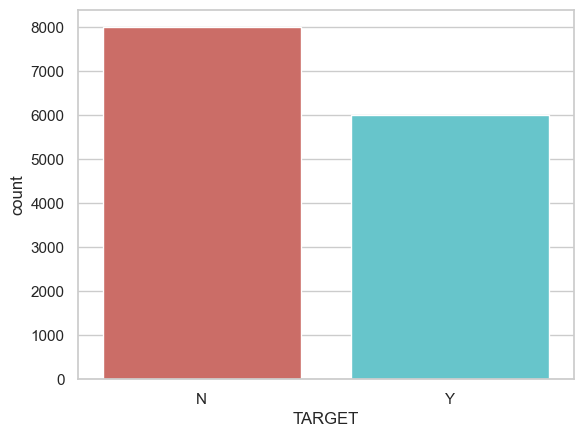

<Figure size 640x480 with 0 Axes>

In [4]:
sns.countplot(x='TARGET', data=df, palette='hls')
plt.show()
plt.savefig('count_plot')

In [5]:
count_no_prod = len(df[df['TARGET']=='N'])
count_prod = len(df[df['TARGET']=='Y'])
pct_of_no_prod = count_no_prod/(count_no_prod+count_prod)
print("% of no new product is purchased is", round(pct_of_no_prod*100))
pct_of_prod = count_prod/(count_no_prod+count_prod)
print("% of yes a new product is purchased is", round(pct_of_prod*100))

% of no new product is purchased is 57
% of yes a new product is purchased is 43


The classes of the predictor are fairly balanced.

Check for missing values

In [6]:
df.isnull().sum()

TARGET        0
loyalty       0
age           0
city          0
LOR           0
prod_A        0
type_A        0
type_B        0
prod_B        0
turnover_A    0
turnover_B    0
contract      0
age_P         0
lor_M         0
dtype: int64

We have no missing values in our data set.

Check to see if the data set size is sufficient.

In [7]:
#Check data types and size
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14016 entries, 0 to 14015
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   TARGET      14016 non-null  object 
 1   loyalty     14016 non-null  int64  
 2   age         14016 non-null  int64  
 3   city        14016 non-null  int64  
 4   LOR         14016 non-null  int64  
 5   prod_A      14016 non-null  int64  
 6   type_A      14016 non-null  int64  
 7   type_B      14016 non-null  int64  
 8   prod_B      14016 non-null  int64  
 9   turnover_A  14016 non-null  float64
 10  turnover_B  14016 non-null  float64
 11  contract    14016 non-null  int64  
 12  age_P       14016 non-null  int64  
 13  lor_M       14016 non-null  int64  
dtypes: float64(2), int64(11), object(1)
memory usage: 1.5+ MB


We have 14,106 observations which is sufficient to build a logistic regression model.

Check that our target is binary or ordinal.

<Axes: xlabel='TARGET', ylabel='count'>

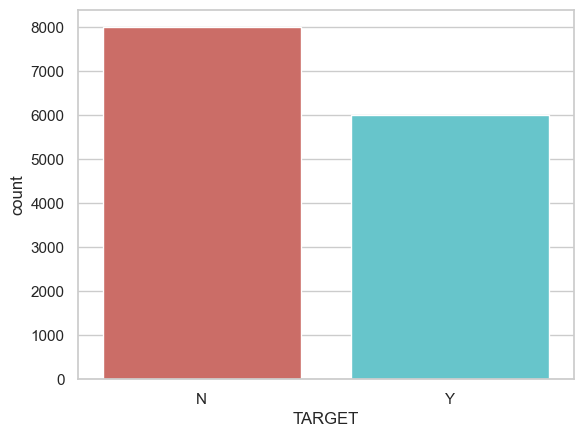

In [8]:
sns.countplot(x = 'TARGET', data = df, palette = 'hls')

Our target is Y/N so it will need to be changed to 1/0.

In [9]:
df = df.replace(to_replace = ['Y','N'],value = [1,0])

In [10]:
#View the data frame to ensure the changes were made
df.head()

,TARGET,loyalty,age,city,LOR,prod_A,type_A,type_B,prod_B,turnover_A,turnover_B,contract,age_P,lor_M
0,0,99,11,2,0,0,0,0,0,357.339500,249.741496,2,11,3
1,0,99,13,2,0,0,0,0,0,351.427321,227.079688,2,13,3
2,0,99,14,2,0,0,0,0,0,345.609148,203.250249,2,14,3
3,0,99,22,2,0,0,0,0,0,398.448554,218.960897,2,22,3
4,0,99,22,2,0,0,0,0,0,355.744324,231.921720,2,22,3


Next, let's look at the numeric attributes and categorical attributes more closely.

In [11]:
#Create lists of numerical and categorical attributes

col_cat=['TARGET', 'loyalty', 'city', 'prod_A', 'type_A', 'prod_B', 'type_B', 'contract']

col_num=['age', 'age_P', 'LOR', 'lor_M', 'turnover_A', 'turnover_B']

print("# of numerical attributes:%s" %len(col_num))
print("# of categorical attributes:%s" %len(col_cat))

# of numerical attributes:6
# of categorical attributes:8


<h4><b>Histograms, Bar Charts, Boxplots and Correlation Matrix</b></h4>

Plot a histogram for each of our numerical attributes.

In [12]:
#Set plot parameters
plt.rcParams.update({'font.size': 12,'figure.figsize':(15,20)}) 

#Ignore warnings
np.warnings.filterwarnings('ignore')

#Use an index to identify the spot of the subplot
j=1

#For each numerical column 
for k in col_num :   
    plt.subplot(6,2,j) 
    plt.hist(df[k])
    plt.title('%s' %k)
    j=j+1 

plt.tight_layout()

#Show results    
plt.show()

AttributeError: module 'numpy' has no attribute 'warnings'

1) age has 86 unique values with a mode of 23, a median of 33, and a mean of 36.  The histogram is right-skewed. <br>
2) age_P has 86 unique values with a mode of 23, a median of 33, and a mean of 36.  This is the same as age.  The histogram is right-skewed. <br>
3) LOR has 7 unique values with a mode of 1, a median of 1, and a mean of 0.93.<br>
4) lor_M has 7 unique values with a mode of 15, a median of 15, and a mean of 14.12. This is the same as LOR just on a monthly scale instead of yearly.<br>
5) turnover_A has 11,008 unique values with no unique mode, a median of 367.89, and a mean of 379.16.<br>
6) turnover_B has 11,008 unique values with no unique mode, a median of 237.66, and a mean of 328.63.<br>

Check the boxplots for outliers.

In [13]:
#Define a figure to which we will add a boxplot for each of our attributes
plt.figure(figsize=(20,40))

#Ignore warnings
np.warnings.filterwarnings('ignore')

#Use an index to identify the spot of the subplot
j=1

#For each numeric variable display a boxplot
for k in col_num :    
    plt.subplot(6,1,j) 
    sns.boxplot(x=k, data=df);
    j=j+1

#Show results    
plt.show()

AttributeError: module 'numpy' has no attribute 'warnings'

<Figure size 2000x4000 with 0 Axes>

We see again that age and age_P are nearly identical.<br>
LOR and lor_M are identical just with a different scale.<br>
Turnover A and Turnover B have a lot of outliers.

Check the correlation matrix to see if any of the numeric values are highly correlated.

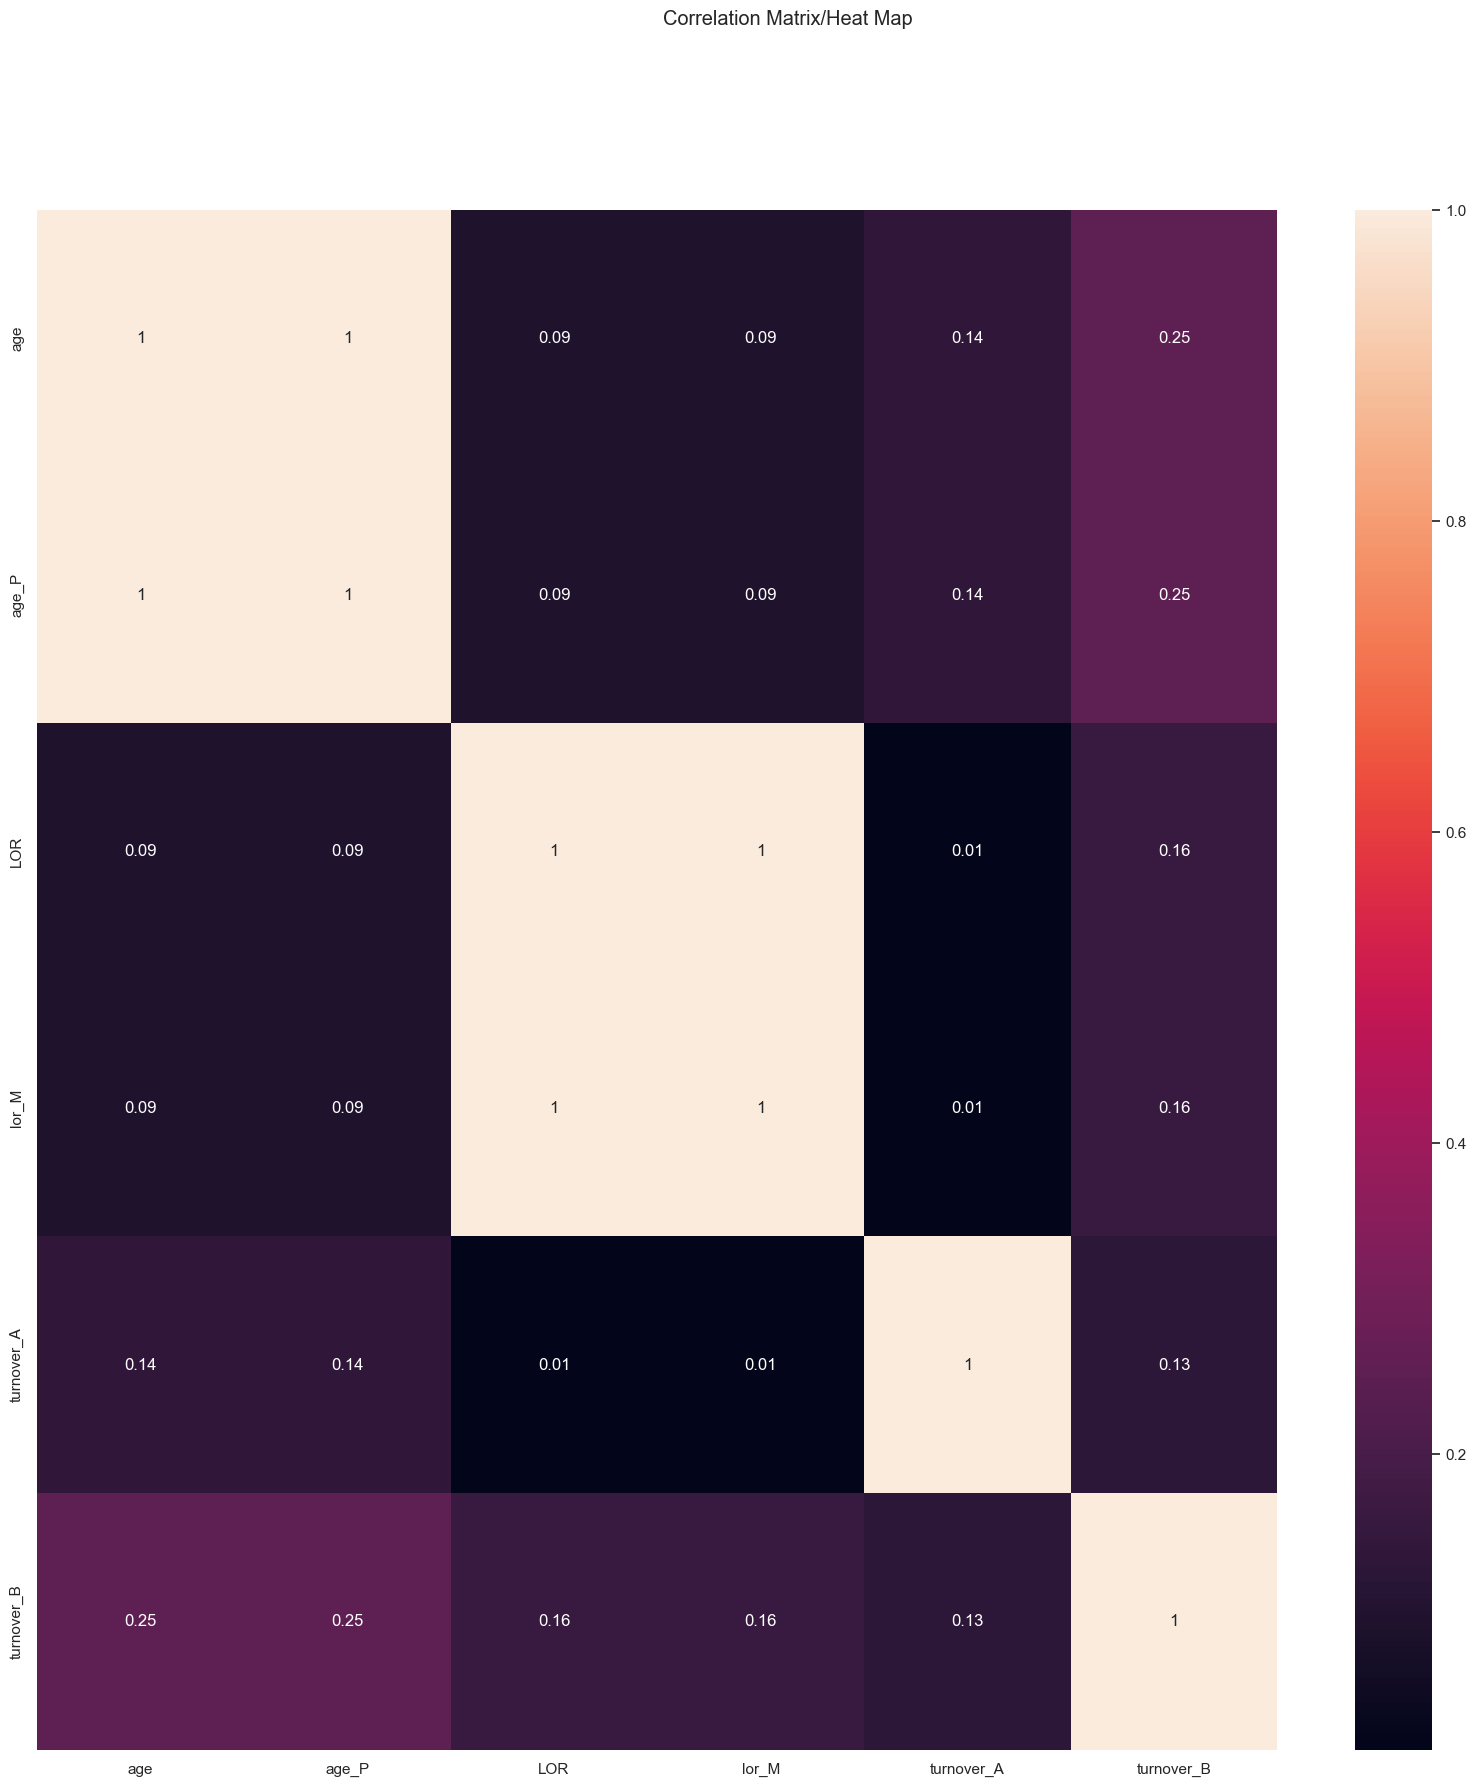

In [14]:
#Graph heat map for correlation
corr_num=df[col_num].corr()
fig = plt.figure(figsize=(20, 20))
sns.heatmap(corr_num, annot=True);
fig.suptitle('Correlation Matrix/Heat Map') 
plt.show()

age and age_P are highly correlated.<br>
LOR and lor_M are highly correlated.<br>
This is what we expected after seeing our results for the histograms and boxplots.

Plot a bar chart for each of the categorical attributes.

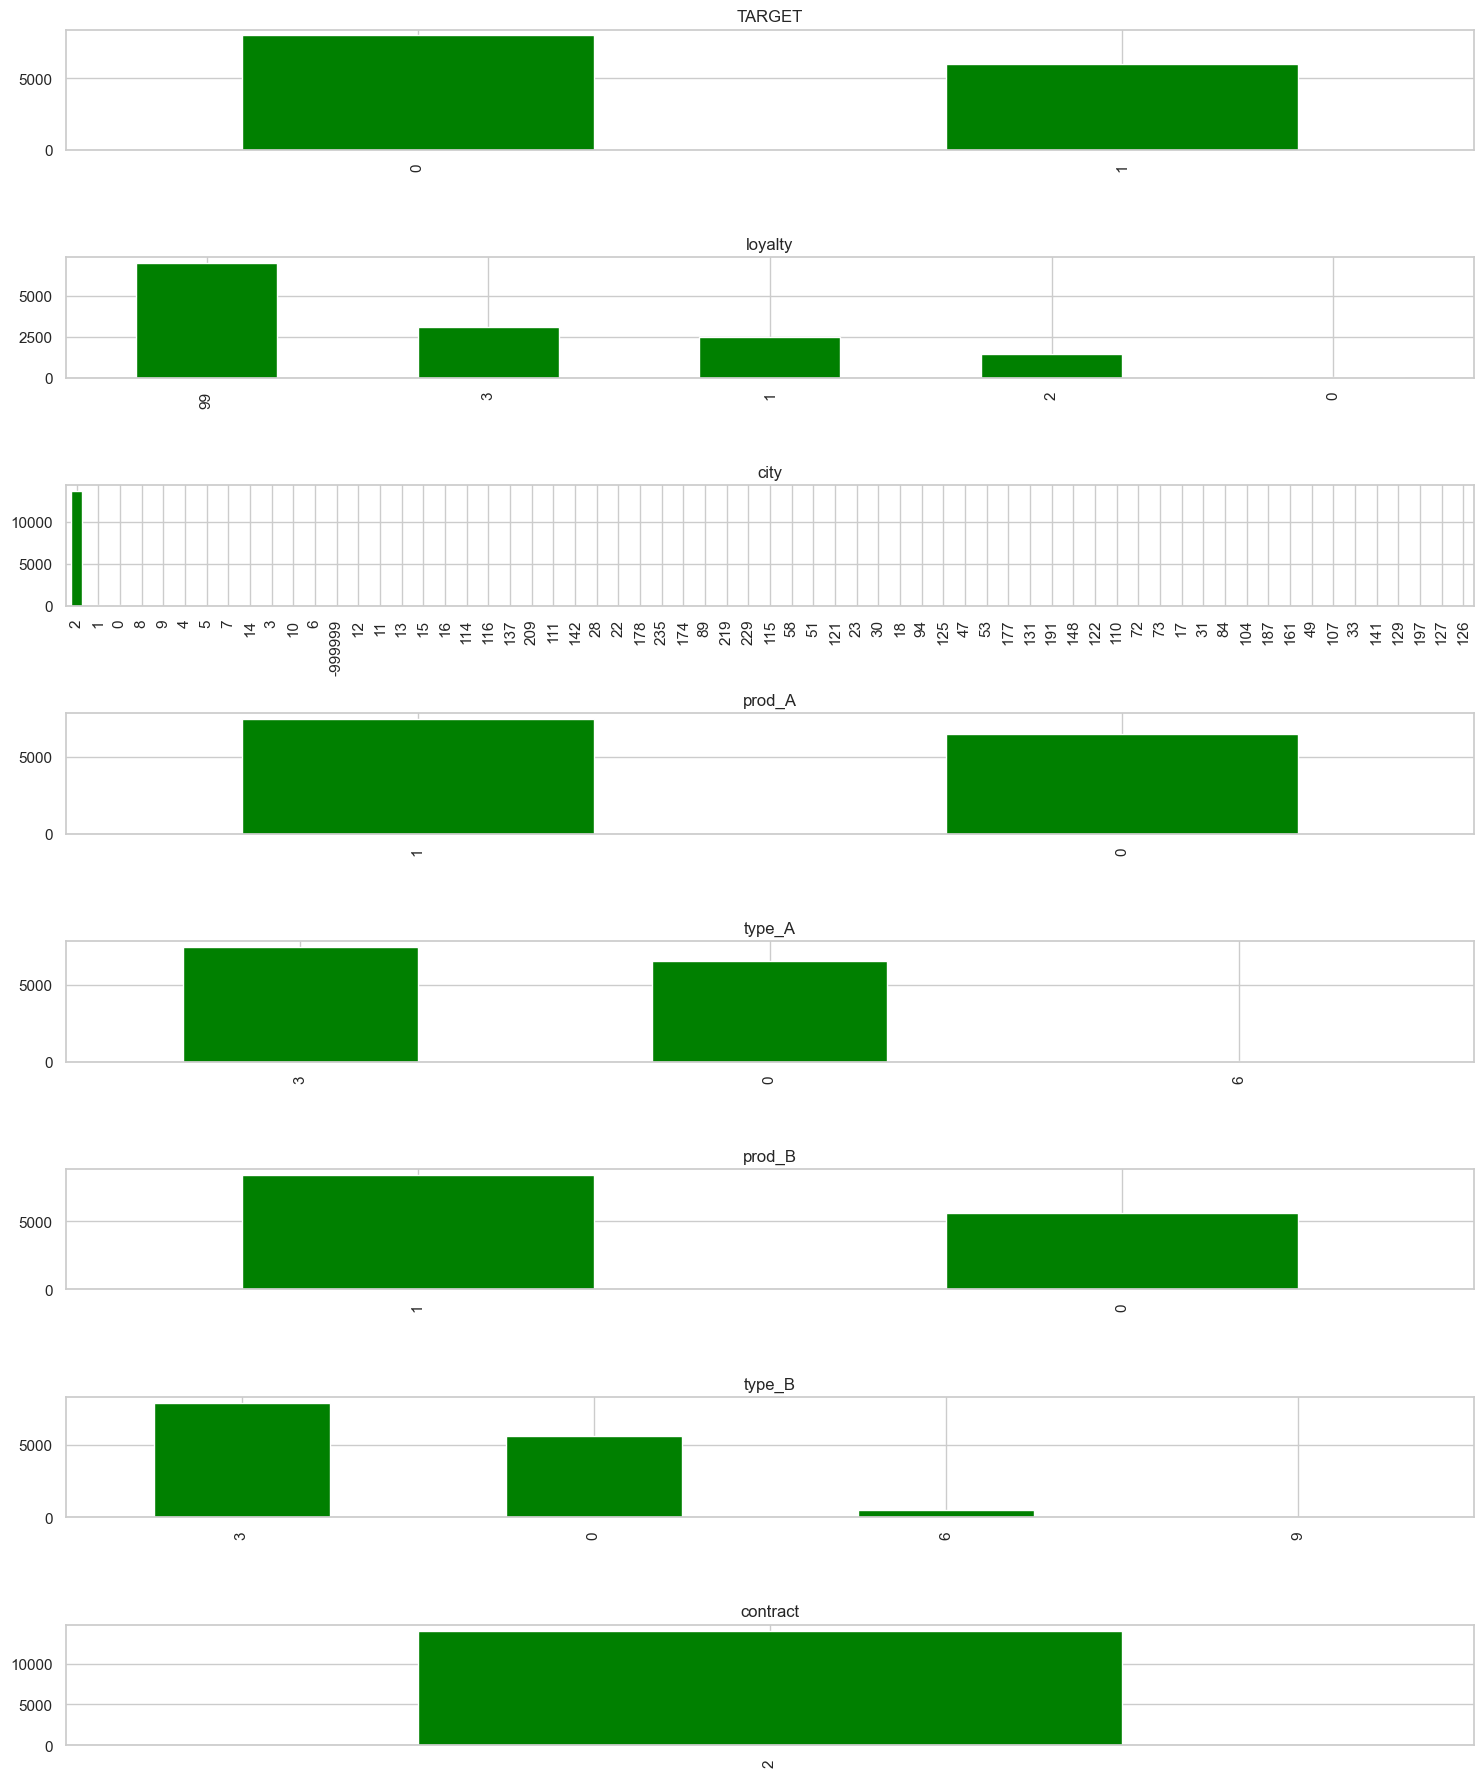

In [15]:
#Use an index to identify the spot of the subplot
j=1

#For each categorical column 
for k in col_cat :   
    plt.subplot(9,1,j) 
    df[k].value_counts().plot(kind='bar', color='green');
    plt.title('%s' %k)
    
#Add 1 to go to the next subplot space
    j=j+1 

plt.tight_layout()

#Show results    
plt.show()

1) The most common observation for TARGET (*attribute we intend to predict*) is N with ~57% No, ~43% Yes. <br>

2) The most common observation for loyalty is 99 which means unclassified.<br>
'99', the unclassified value, ~46% of the values<br>
'3' = ~24% of the values<br>
'2' = ~11% of the values<br>
'1' = ~18% of the values<br>
'0' = ~1% of the values<br>

3) The most common observation for city is 2.  ~97.8% of values are of one particular city, a highly imbalanced class.<br>

4) The most common observation for prod_A is 1 which means that product A was purchased. ~42% of values have bought product A, ~58% of values have not bought product A.<br>

5) The most common observation for type_A is 3. ~58% of values are '3', ~42% of values are '0', ~0.2% of values are '6'.<br>

6) The most common observation for prod_B is 1 which means that product B was purchased. ~65% of values have bought product B, ~35% of values have not bought product B.<br>

7) The most common observation for type_B is 3. ~61% of values are '3', ~35% of values are '0', ~4% of values are '6', and ~0.3% of values are '9'.<br>

8) Contract only contains the number 2.  We will drop this column from the data set since it is not predictive.<br>

Let's take a closer look at city.

In [16]:
print(df['city'].value_counts())

2      13720
1         28
0         26
8         21
9         20
       ...  
141        1
129        1
197        1
127        1
126        1
Name: city, Length: 65, dtype: int64


13,720 of the 14,016 rows have a city value of 2.  This is about 97.89% of our data.  We will drop the city column since it will not be predictive.

In [17]:
#Check for duplicates
df[df.duplicated()]

,TARGET,loyalty,age,city,LOR,prod_A,type_A,type_B,prod_B,turnover_A,turnover_B,contract,age_P,lor_M
10,1,99,23,2,0,0,0,0,0,344.970885,200.509497,2,23,3
18,1,99,23,2,0,0,0,0,0,391.468245,201.137168,2,23,3
22,1,99,23,2,0,0,0,0,0,482.088212,201.423182,2,23,3
49,1,99,23,2,0,0,0,0,0,312.372399,203.346010,2,23,3
52,1,99,23,2,0,0,0,0,0,391.856106,203.514047,2,23,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13993,1,1,37,2,5,0,0,3,1,321.194326,287.000973,2,37,63
13997,1,1,42,2,5,0,0,3,1,381.976630,301.201941,2,42,63
14000,1,1,46,4,5,1,3,6,1,487.749644,4520.203788,2,46,63
14004,1,1,50,2,5,1,3,6,1,455.904742,436.696355,2,50,63


In checking for duplicates, 3,008 duplicate rows were found.  We will need to delete the duplicates for an accurate analysis.

In [18]:
df = df.drop_duplicates()

#Check to make sure the duplicates were dropped
len(df)

11008

Our data set went from 14,016 rows to 11,008 rows after we removed the duplicates.

<b> Distribution of categorical variables (with more than 2 categories) vs frequency of TARGET<b>

Text(0, 0.5, 'Frequency of Purchase')

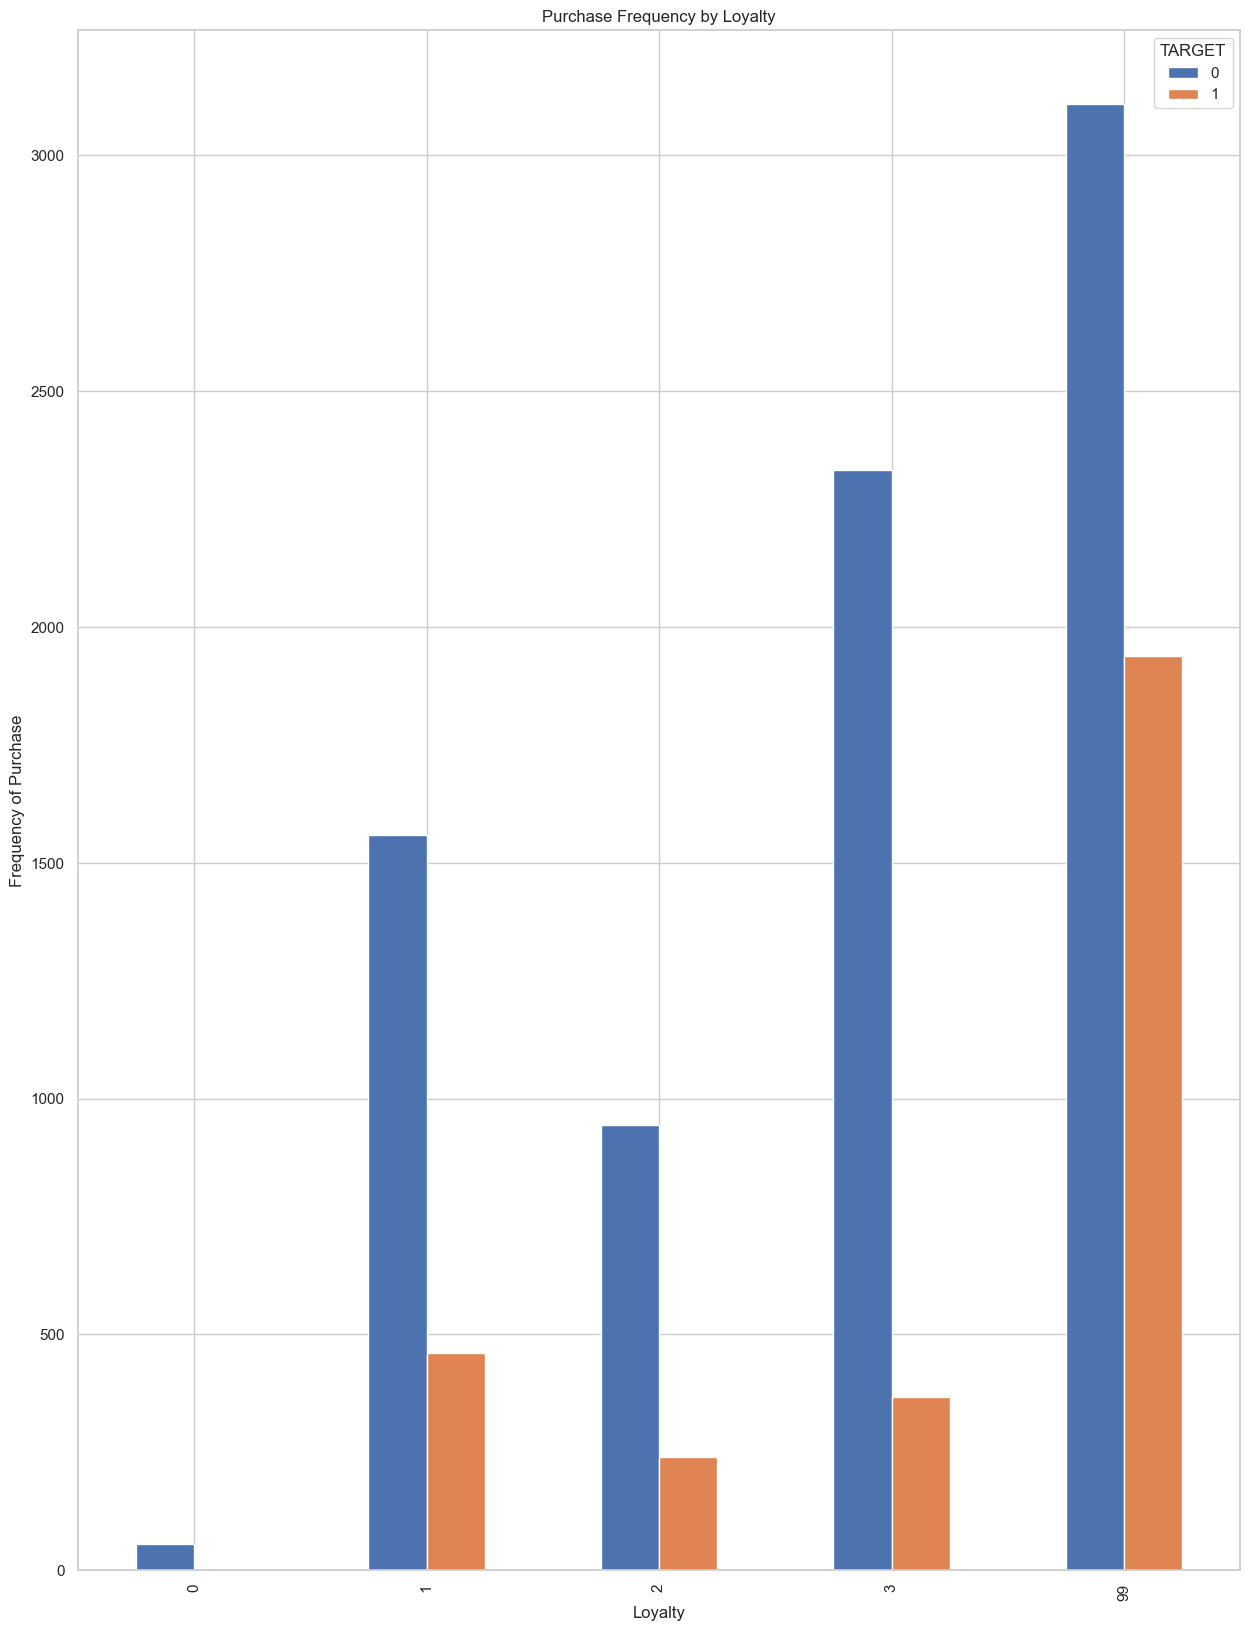

In [19]:
%matplotlib inline
pd.crosstab(df.loyalty,df.TARGET).plot(kind='bar')
plt.title('Purchase Frequency by Loyalty')
plt.xlabel('Loyalty')
plt.ylabel('Frequency of Purchase')

Very few people belong to the loyalty class of 0 and most are in the class 99 which is unclassified.

Text(0, 0.5, 'Frequency of Purchase')

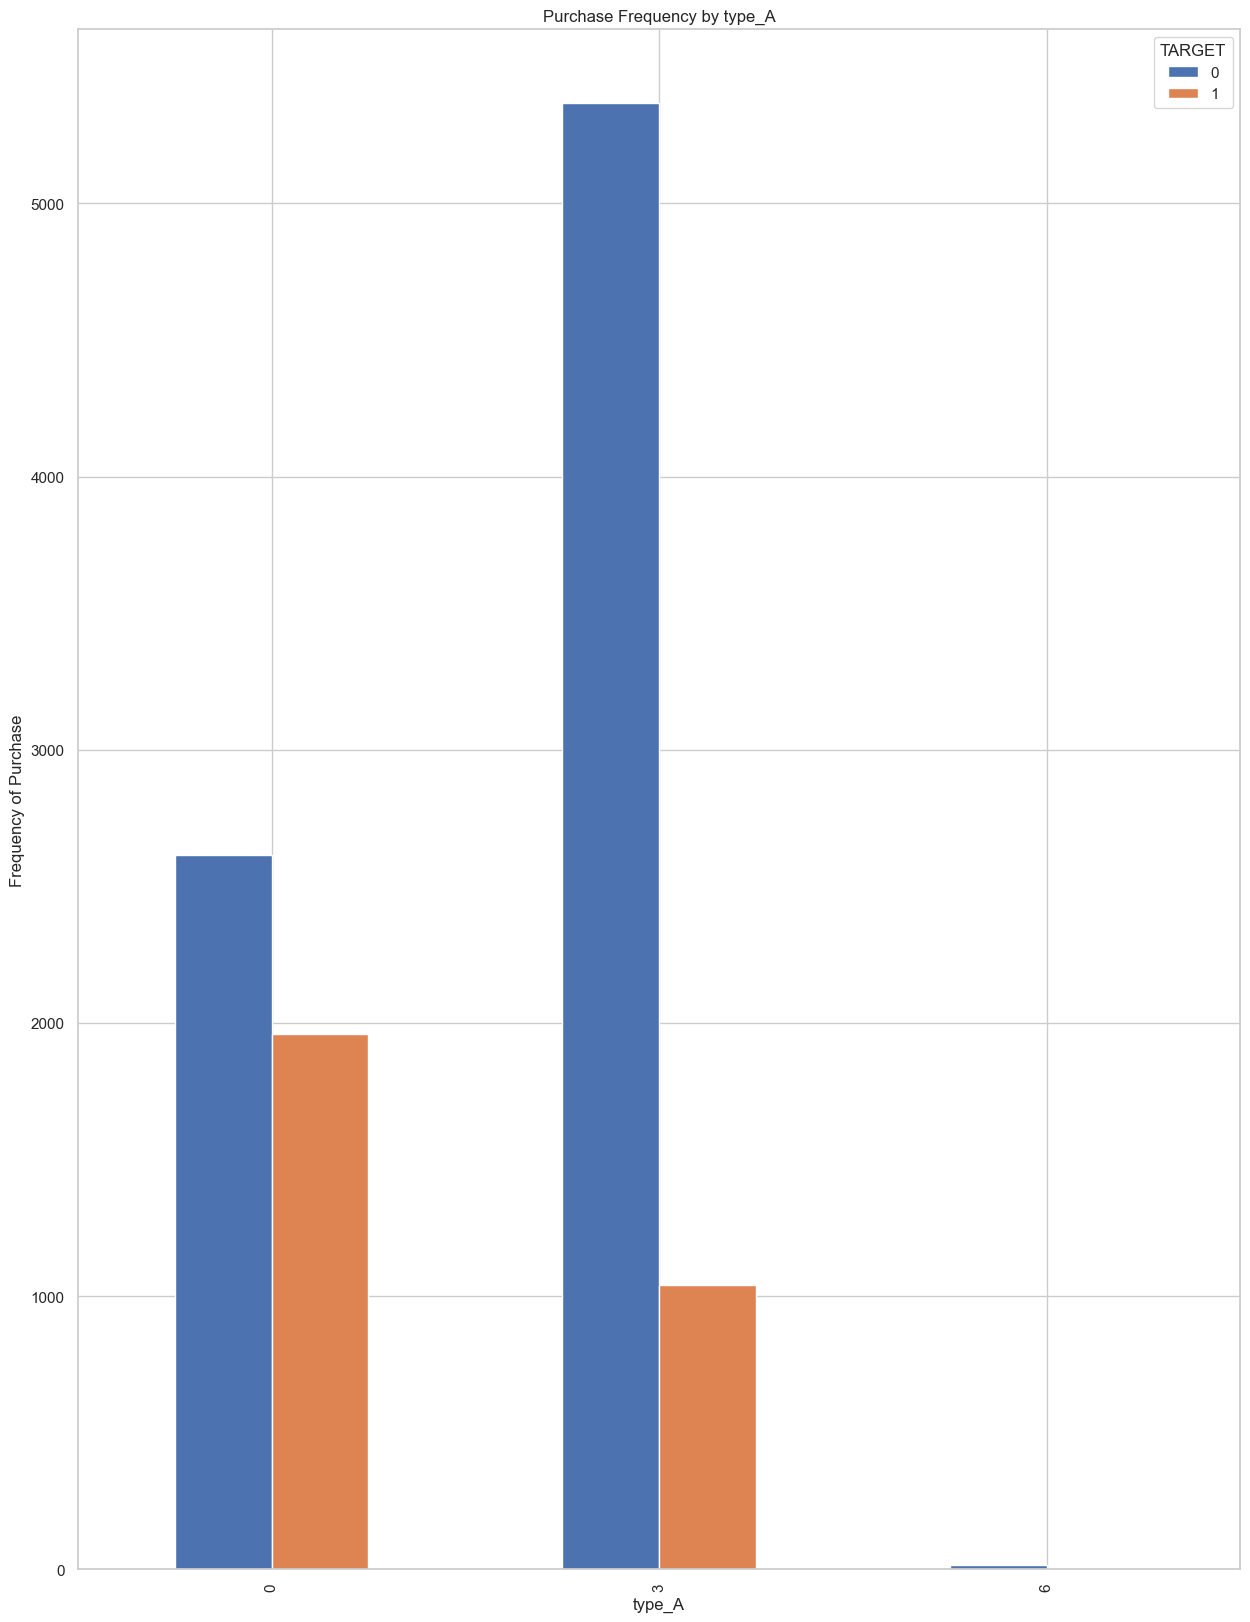

In [20]:
pd.crosstab(df.type_A,df.TARGET).plot(kind='bar')
plt.title('Purchase Frequency by type_A')
plt.xlabel('type_A')
plt.ylabel('Frequency of Purchase')

Very few people belong to the type_A class of 6.

Text(0, 0.5, 'Frequency of Purchase')

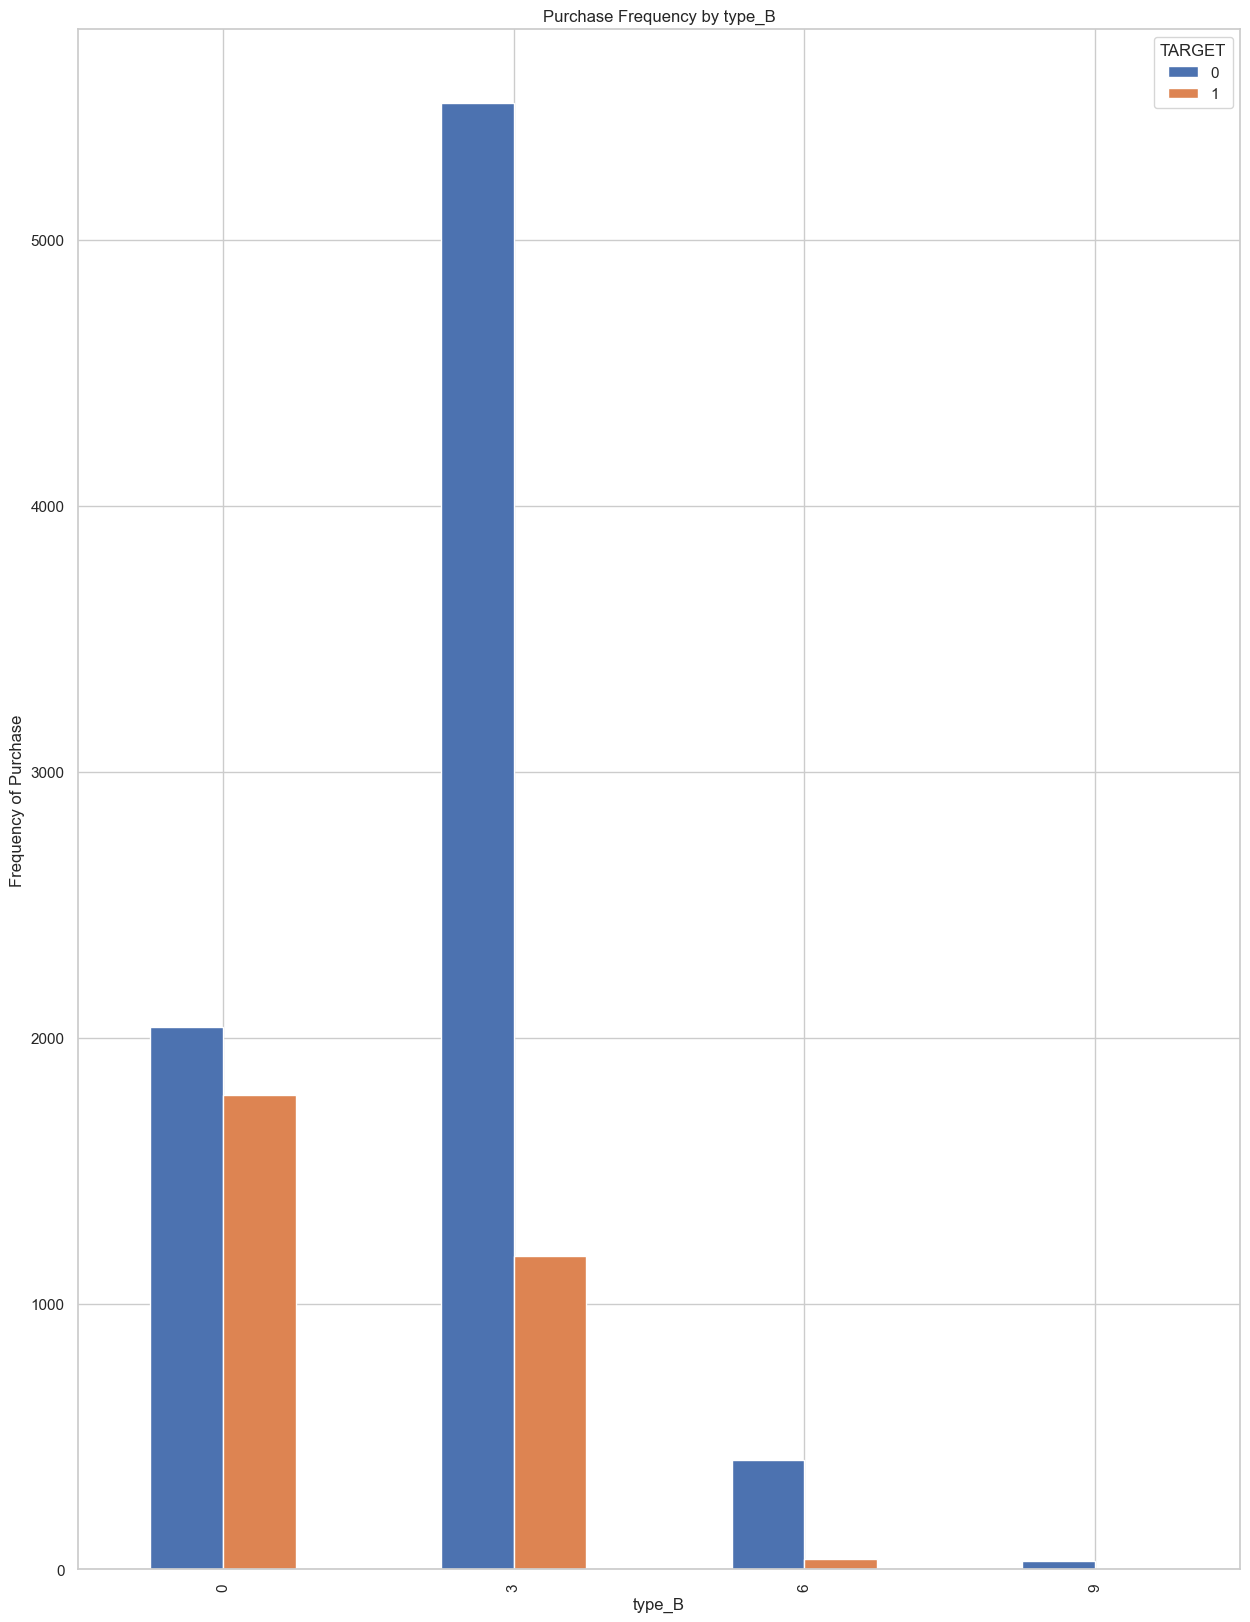

In [21]:
pd.crosstab(df.type_B,df.TARGET).plot(kind='bar')
plt.title('Purchase Frequency by type_B')
plt.xlabel('type_B')
plt.ylabel('Frequency of Purchase')

Very few people belong to the type_B class 6 or 9.

<h3><b>Data Preparation</b></h3>

Drop unnecessary columns from our data set.<br>
Drop the city column because 97.89% of its values are 2.<br>
Drop the contract column because it only contains the value 2. <br>
These numbers are meaningless to our analysis so we will removed them from our data set.<br>

Drop age_p as it is perfectly correlated with age.<br>
Drop lor_M as it is perfectly correlated with LOR.<br>

In [22]:
#Drop the city, contract, age_p, and lor_M columns.
df2 = df.drop(df.columns[[3, 11, 12, 13]], axis=1)

#View the data frame to ensure that the columns were removed
df2.head()

,TARGET,loyalty,age,LOR,prod_A,type_A,type_B,prod_B,turnover_A,turnover_B
0,0,99,11,0,0,0,0,0,357.339500,249.741496
1,0,99,13,0,0,0,0,0,351.427321,227.079688
2,0,99,14,0,0,0,0,0,345.609148,203.250249
3,0,99,22,0,0,0,0,0,398.448554,218.960897
4,0,99,22,0,0,0,0,0,355.744324,231.921720


In [23]:
df2.groupby('TARGET').mean()

,loyalty,age,LOR,prod_A,type_A,type_B,prod_B,turnover_A,turnover_B
TARGET,,,,,,,,,
0,39.791625,33.027125,1.081375,0.673000,2.025000,2.411625,0.74475,360.368141,371.263176
1,64.464428,39.680519,0.720080,0.348737,1.053191,1.263630,0.40625,404.152250,271.932769


We see that on average, people who purchase an additional insurance product are a bit older, length of relationship is shorter, they spent more on prod A and less on prod B.

For people who do not purchase an additional insurance product, on average they are a bit younger, the length of relationship is longer, they spend more on prod_B and less on prod_A.

Create dummy variables for categorial variables.

In [24]:
#Get dummies
categorical_dummy=pd.get_dummies(df.loyalty, drop_first = False)

#Rename columns
categorical_dummy.columns = ['loyalty_0', 'loyalty_1', 'loyalty_2', 'loyalty_3','loyalty_99']

#Display first 5 rows
categorical_dummy.head()

,loyalty_0,loyalty_1,loyalty_2,loyalty_3,loyalty_99
0,0,0,0,0,1
1,0,0,0,0,1
2,0,0,0,0,1
3,0,0,0,0,1
4,0,0,0,0,1


In [25]:
#Get dummies
categorical_dummy2=pd.get_dummies(df.type_A, drop_first = False)

#Rename columns
categorical_dummy2.columns = ['typeA_0', 'typeA_3', 'typeA_6']

#Display first 5 rows
categorical_dummy2.head()

,typeA_0,typeA_3,typeA_6
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [26]:
#Get dummies
categorical_dummy3=pd.get_dummies(df.type_B, drop_first = False)

#Rename columns
categorical_dummy3.columns = ['typeB_0', 'typeB_3', 'typeB_6', 'typeB_9']

#Display first 5 rows
categorical_dummy3.head()

,typeB_0,typeB_3,typeB_6,typeB_9
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0


In [27]:
#Concatenate the data frame with the dummies
df2 = pd.concat([df2, categorical_dummy, categorical_dummy2, categorical_dummy3], axis=1)

#Drop the columns that were converted to dummies.
#Dummy variable encoding always represents C categories with C-1 binary variables so also drop loyalty_0, typeA_0 and 
#typeB_0.
#Source: https://machinelearningmastery.com/one-hot-encoding-for-categorical-data/
df3 = df2.drop(['loyalty', 'loyalty_0', 'type_A', 'typeA_6', 'type_B', 'typeB_9'], axis=1)

#Check results
df3.head()

,TARGET,age,LOR,prod_A,prod_B,turnover_A,turnover_B,loyalty_1,loyalty_2,loyalty_3,loyalty_99,typeA_0,typeA_3,typeB_0,typeB_3,typeB_6
0,0,11,0,0,0,357.339500,249.741496,0,0,0,1,1,0,1,0,0
1,0,13,0,0,0,351.427321,227.079688,0,0,0,1,1,0,1,0,0
2,0,14,0,0,0,345.609148,203.250249,0,0,0,1,1,0,1,0,0
3,0,22,0,0,0,398.448554,218.960897,0,0,0,1,1,0,1,0,0
4,0,22,0,0,0,355.744324,231.921720,0,0,0,1,1,0,1,0,0


<h3><b>Prepped Data Review</b></h3>

Since we deleted duplicates, deleted some columns, and added others. Let's look at our EDA again.

In [28]:
#Create lists of numerical and categorical attributes

col_cat2=['TARGET', 'loyalty_1', 'loyalty_2', 'loyalty_3','loyalty_99', 'prod_A', 'typeA_0', 
          'typeA_3', 'prod_B', 'typeB_0', 'typeB_3', 'typeB_6']

col_num2=['age', 'LOR', 'turnover_A', 'turnover_B']

print("# of numerical attributes:%s" %len(col_num2))
print("# of categorical attributes:%s" %len(col_cat2))

# of numerical attributes:4
# of categorical attributes:12


We went from 6 numerical attributes to 4 and 8 categorical attributes to 12.

Look at how the histograms to see how the numerical values have changed.

In [29]:
#Set plot parameters
plt.rcParams.update({'font.size': 12,'figure.figsize':(15,20)}) 

#Ignore warnings
np.warnings.filterwarnings('ignore')

#Use an index to identify the spot of the subplot
j=1

#For each numerical column 
for k in col_num2 :   
    plt.subplot(4,2,j) 
    plt.hist(df3[k])
    plt.title('%s' %k)
    j=j+1 

plt.tight_layout()

#Show results    
plt.show()

AttributeError: module 'numpy' has no attribute 'warnings'

1) age has 86 unique values with a mode of 23, a median of 31, and a mean of 35.  The mode did not change but the median decreased from 33 to 31 and the mean decreased from 36 to 35.  The histogram is right-skewed.<br>
2) LOR has 7 unique values with a mode of 1, a median of 1, and a mean of 0.98.  The mode and median stayed the same, but the mean increased slightly from 0.93 to 0.98. <br>
3) turnover_A has 11,008 unique values with no unique mode, a median of 361.93, and a mean of 372.33. The median decreased from 367.89 to 361.93 and the mean decreased from 379.16 to 372.33.<br>
4) turnover_B has 11,008 unique values with no unique mode, a median of 235.08, and a mean of 344.12. The median decreased from 237.66 to 235.08 and the mean increased from 328.63 to 344.12.<br>

Let's look at the outliers of the numerical data to see how it's changed.

In [30]:
#Define a figure to which we will add a boxplot for each of our attributes
plt.figure(figsize=(20,40))

#Ignore warnings
np.warnings.filterwarnings('ignore')

#Use an index to identify the spot of the subplot
j=1

#For each numeric variable display a boxplot
for k in col_num2 :    
    plt.subplot(4,1,j) 
    sns.boxplot(x=k, data=df3);
    j=j+1

#Show results    
plt.show()

AttributeError: module 'numpy' has no attribute 'warnings'

<Figure size 2000x4000 with 0 Axes>

We have outliers with each of our variables, but it is the most extreme for turnover_A and turnover_B.

Check for independence between features.

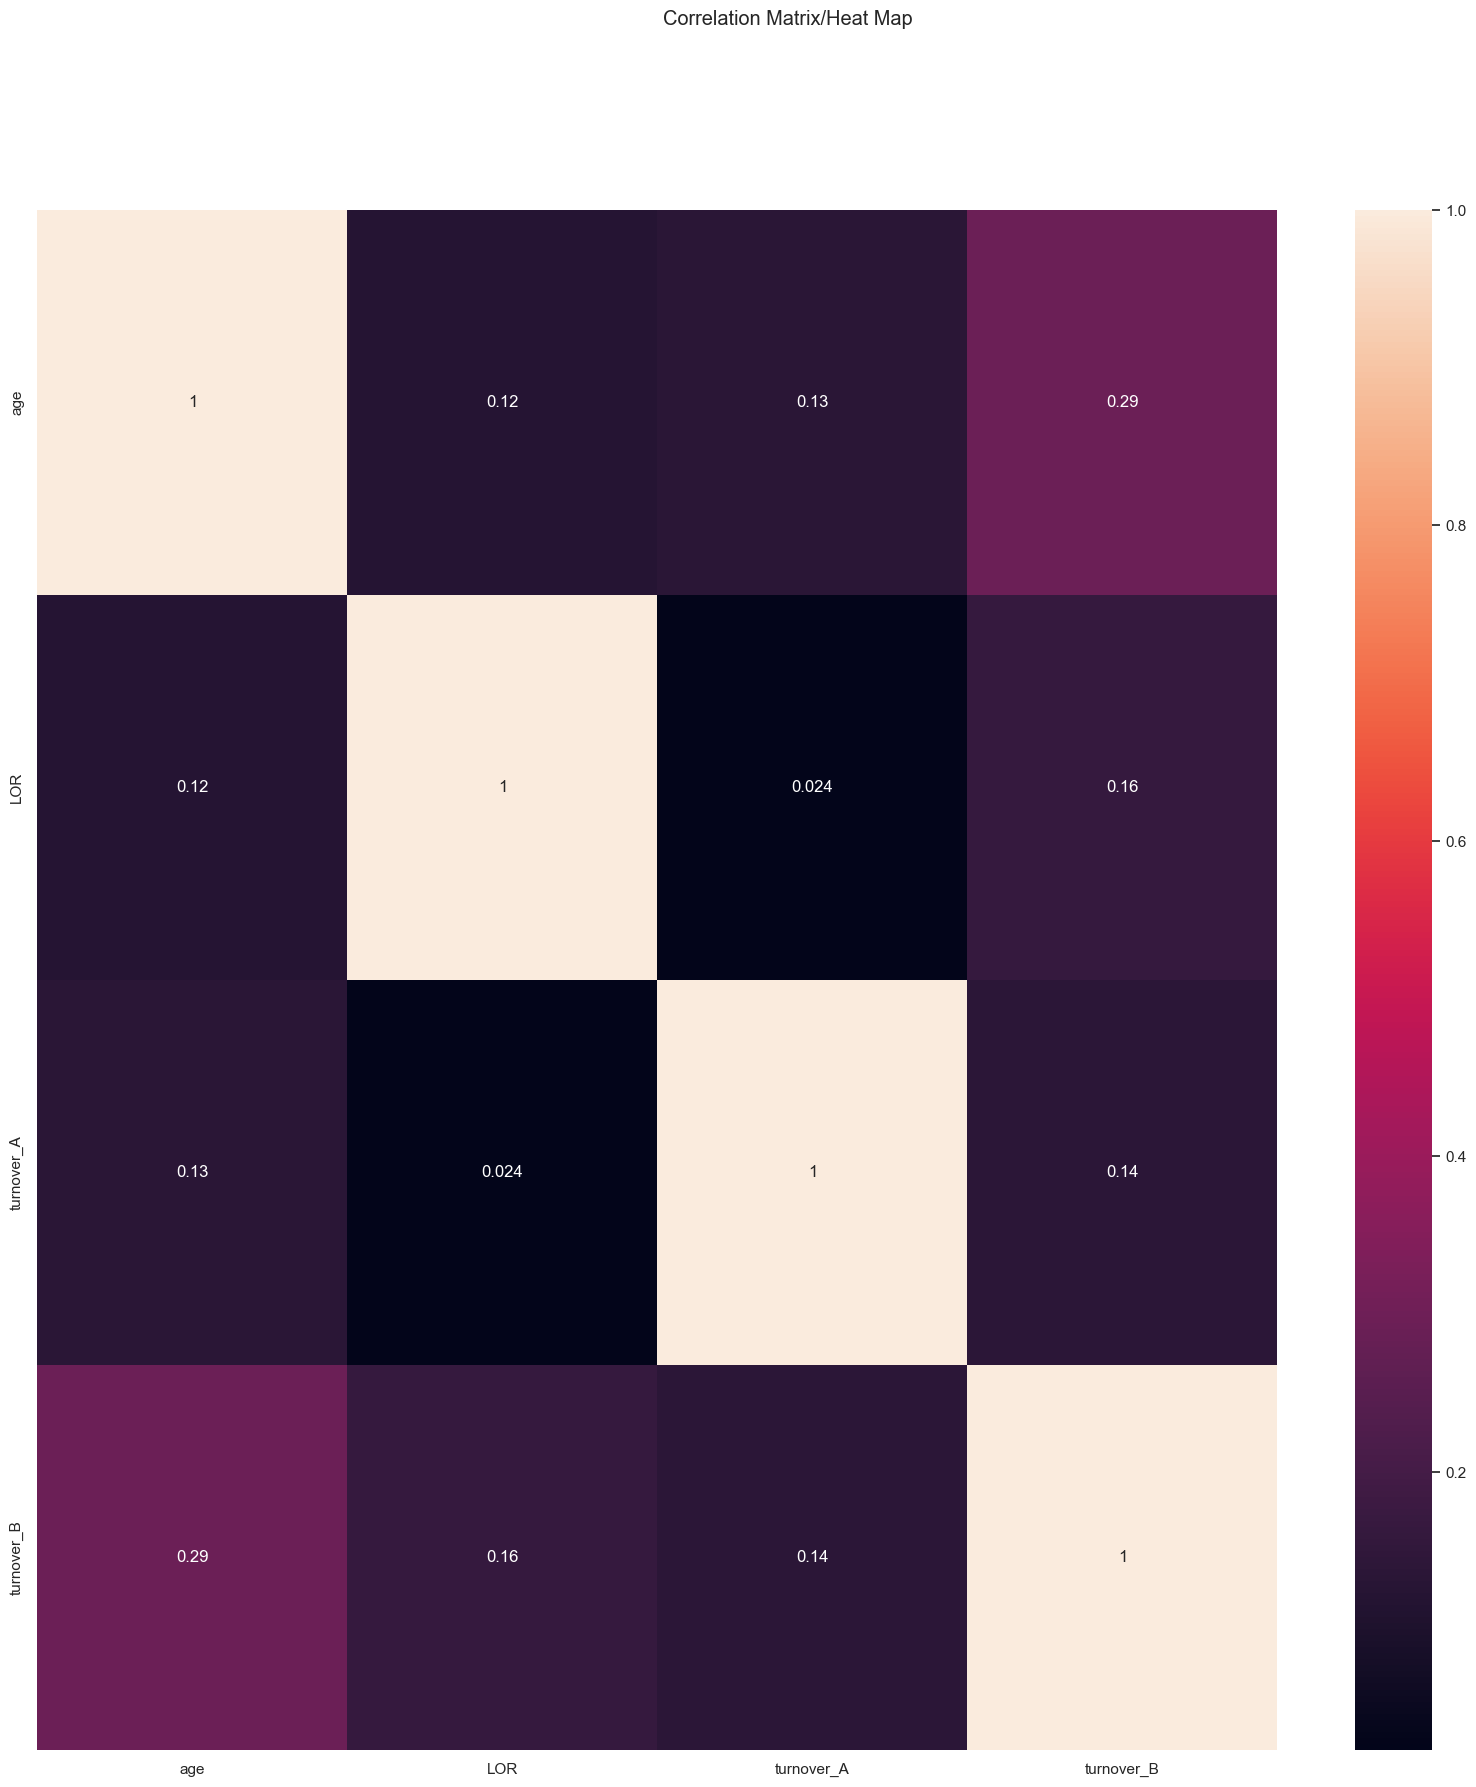

In [31]:
#Graph heat map for correlation
corr_num=df3[col_num2].corr()
fig = plt.figure(figsize=(20, 20))
sns.heatmap(corr_num, annot=True);
fig.suptitle('Correlation Matrix/Heat Map') 
plt.show()

The numeric variables show little correlation with each other.

Look at the box plots of the categorical variables to see how they have changed.

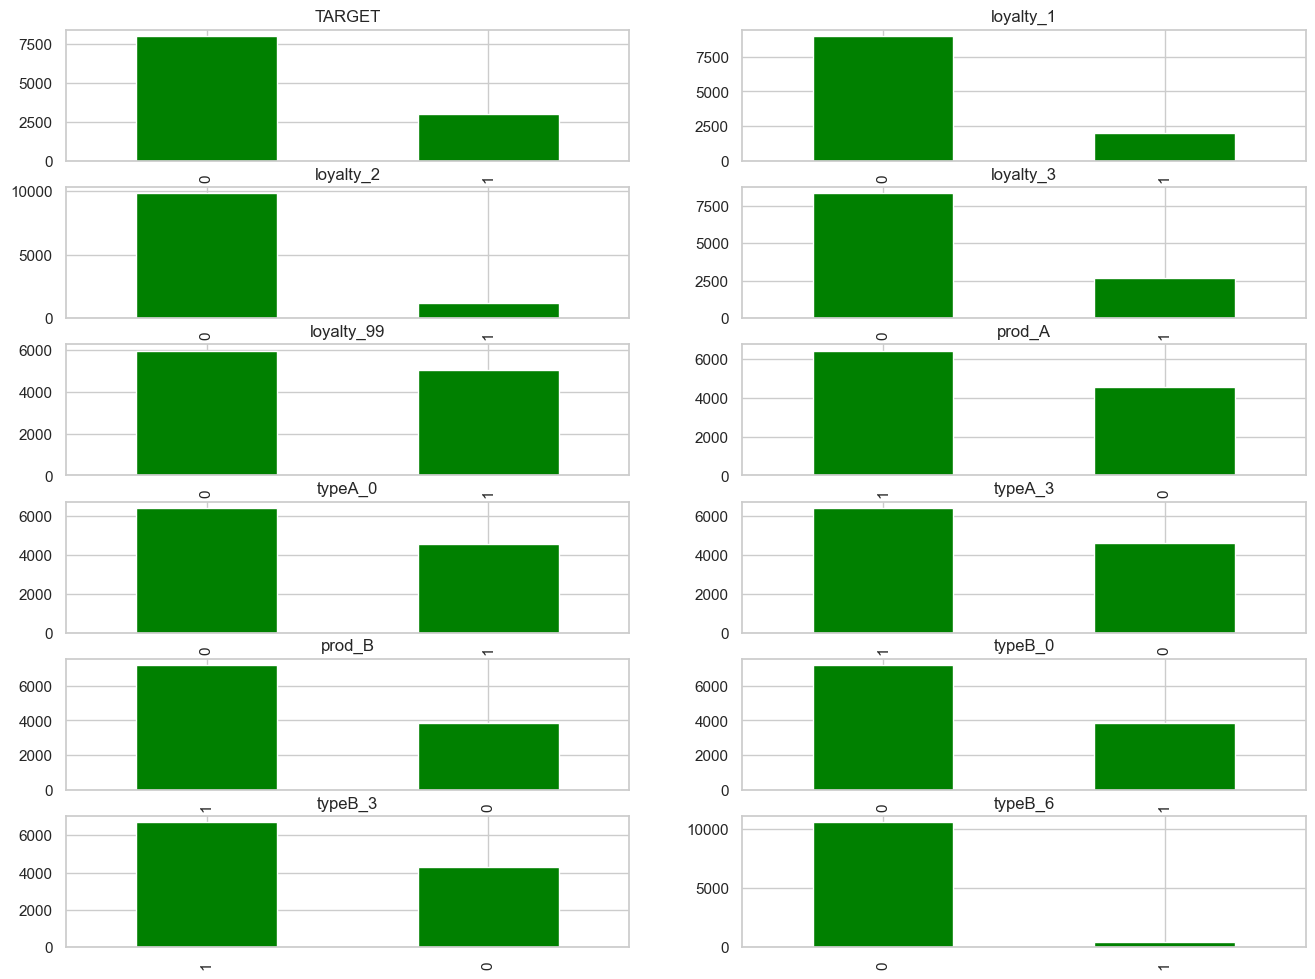

In [32]:
#Use an index to identify the spot of the subplot
j=1

#For each categorical column 
for k in col_cat2 :   
    plt.subplot(8,2,j) 
    df3[k].value_counts().plot(kind='bar', color='green');
    plt.title('%s' %k)
    
#Add 1 to go to the next subplot space
    j=j+1
    
plt.gcf().set_size_inches(16, 16)

#Show results    
plt.show()

**Percentage breakdown for categorical attributes is as follows:**

**TARGET:**
0 - ~73% of the values, 1 - ~27% of the values<br>
**loyalty_1:**
0 - ~82% of the values, 1 - ~18% of the values<br>
**loyalty_2:**
0 - ~89% of the values, 1 - ~11% of the values<br>
**loyalty_3:**
0 - ~75% of the values, 1 - ~25% of the values<br>
**loyalty_99:**
0 - ~54% of the values, 1 - ~46% of the values<br>
**prod_A:**
0 - ~42% of the values, 1 - ~58% of the values<br>
**typeA_0:**
0 - ~58% of the values, 1 - ~42% of the values<br>
**typeA_3:**
0 - ~42% of the values, 1 - ~58% of the values<br>
**prod_B:**
0 - ~35% of the values, 1 - ~65% of the values<br>
**typeB_0:**
0 - ~65% of the values, 1 - ~35% of the values<br>
**typeB_3:**
0 - ~39% of the values, 1 - ~61% of the values<br>
**typeB_6:**
0 - ~96% of the values, 1 - ~4% of the values<br>

Check to see if the predictor variable, TARGET, is balanced.

In [33]:
df3['TARGET'].value_counts()

0    8000
1    3008
Name: TARGET, dtype: int64

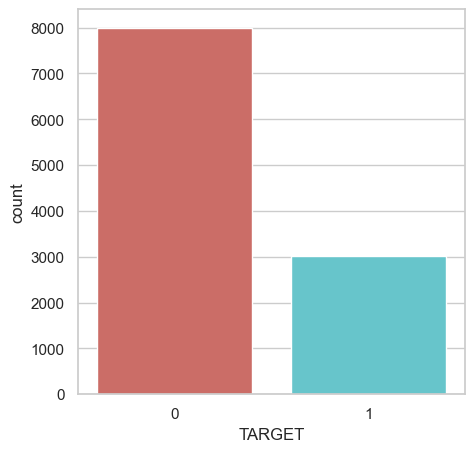

In [34]:
plt.figure(figsize=(5,5))
sns.countplot(x='TARGET', data=df3, palette='hls')
plt.show()

In [35]:
#Calculate the imbalance of TARGET
count_no_prod2 = len(df3[df3['TARGET']==0])
count_prod2 = len(df3[df3['TARGET']==1])
pct_of_no_prod2 = count_no_prod2/(count_no_prod2 + count_prod2)
print("% of no new product is purchased is", round(pct_of_no_prod2 * 100))
pct_of_prod2 = count_prod2/(count_no_prod2 + count_prod2)
print("% of yes a new product is purchased is", round(pct_of_prod2 * 100))

% of no new product is purchased is 73
% of yes a new product is purchased is 27


After the duplicate rows were deleted, the classes of the TARGET variable became imbalanced.  We will need to keep this in mind when training and testing our models.

<b>Predictive Insights<b>

Plot numerical values vs target to see if we can gain some predictive insights.

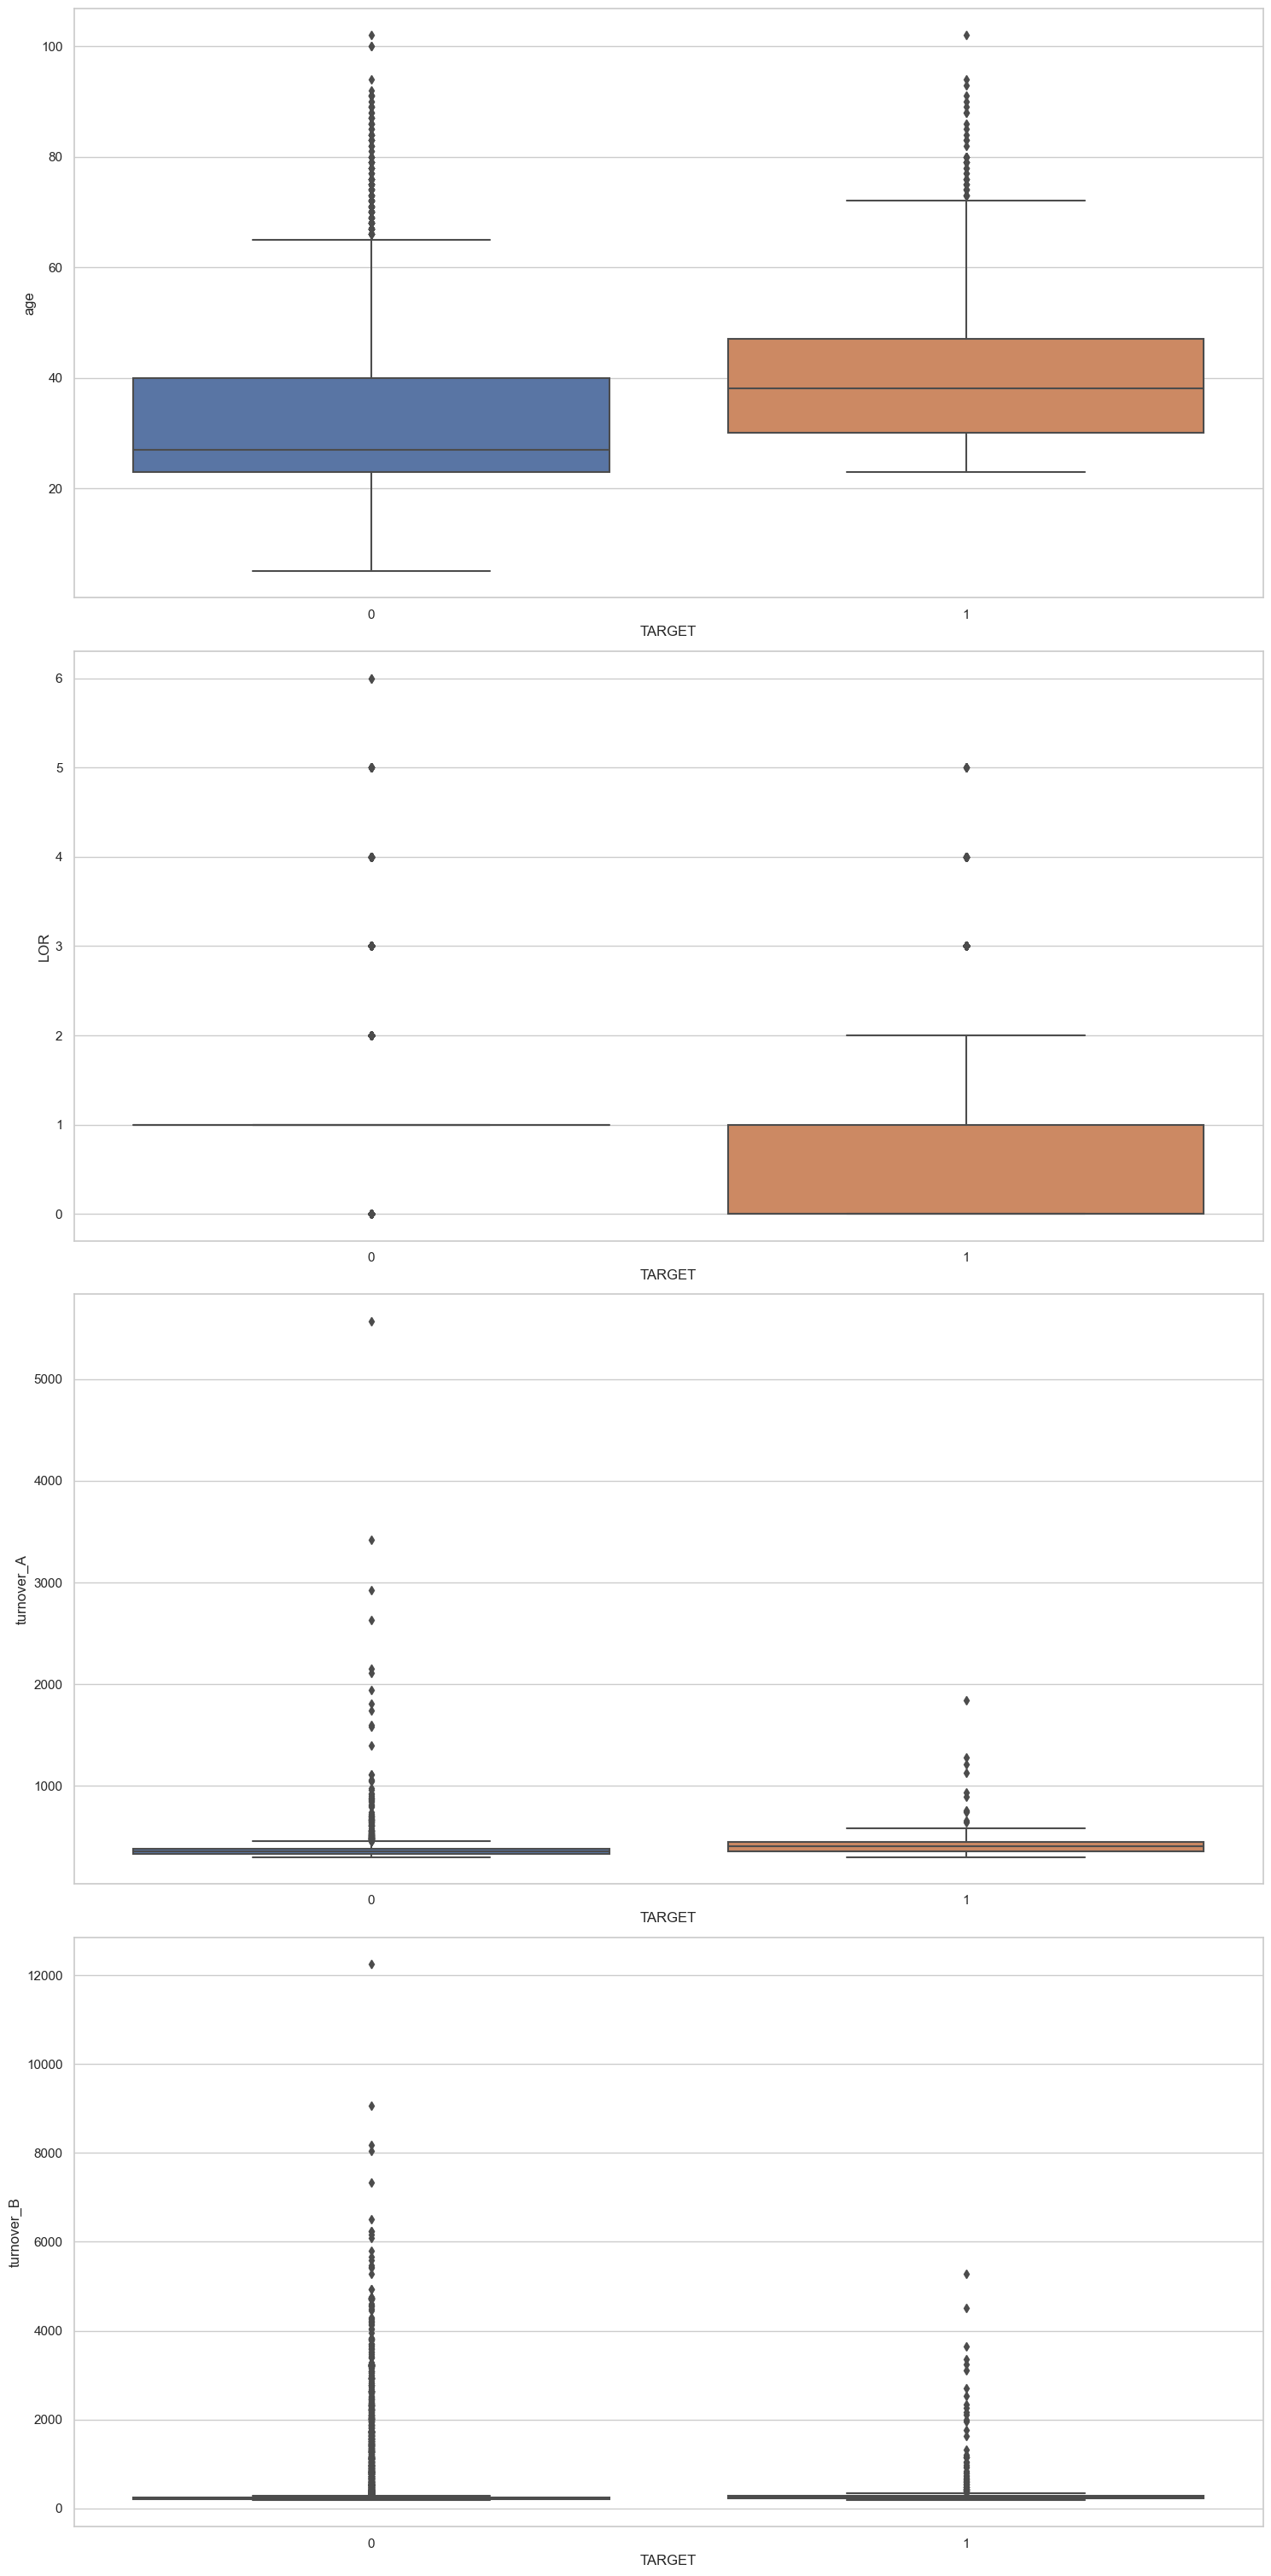

In [36]:
#Set plot parameters
plt.rcParams.update({'font.size': 10,'figure.figsize':(15,75)}) 

#Use an index to identify the spot of the subplot
j=1

#For each categorical attribute
for k in df3[col_num2].columns.to_list():    
    plt.subplot(10,1,j) 
    sns.boxplot(data=df3, y=k, x='TARGET')
    j=j+1

plt.tight_layout()

#Show results    
plt.show()

It seems that age, turnover_A, and turnover_B will be more predictive than LOR.

In [37]:
col_cat3=['loyalty_1', 'loyalty_2', 'loyalty_3', 'loyalty_99', 'prod_A', 'typeA_0', 'typeA_3', 'prod_B', 'typeB_0', 
          'typeB_3', 'typeB_6']

#Import stats module to perform chi-square
from scipy import stats

#Perform chi-square test
chi_sq=[]
for i in range(0,11):
    chi_sq.append([stats.chi2_contingency(pd.crosstab(df3['TARGET'], df3[col_cat3].iloc[:,i]))[0:2],i])
    
#Chi_sq
chi_sq.sort(reverse=True)
chi_sq

[[(1102.8339097323103, 7.997446982518402e-242), 8],
 [(1102.8339097323103, 7.997446982518402e-242), 7],
 [(945.6020060693334, 1.198839772045794e-207), 6],
 [(945.0489278542645, 1.5812019055507576e-207), 5],
 [(945.0489278542645, 1.5812019055507576e-207), 4],
 [(810.9315410341604, 2.266560521021541e-178), 9],
 [(573.8826849863078, 8.030328831919668e-127), 3],
 [(337.4176978315813, 2.32946552637834e-75), 2],
 [(78.13947565224755, 9.601583081143522e-19), 10],
 [(32.0711491309731, 1.4862822215103112e-08), 1],
 [(24.85171762915519, 6.19138538725396e-07), 0]]

The chi-square test tells us the following columns should be the most significant categorical columns to include in our analysis:<br>
Column 8 - typeB_0 <br>
Column 7 - prod_B <br>
Column 6 - typeA_3 <br>
Column 5 - typeA_0 <br>
Column 4 - prod_A <br>

<h3><b>Regression Modeling</b></h3>

<b> Model 1<b>

In [38]:
#Define a vector containing the names of the attributes to use
predictors = ['age', 'typeB_0', 'prod_B'] 

X1 = df3[predictors]
y1 = df3.TARGET

#Use 33% data to train 
#Use random state number 20 to make sure result is fixed 
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.33, random_state=20)

#Define the model type as logistic regression
model = LogisticRegression()

#Train the algorithm
model.fit(X_train, y_train)

LogisticRegression()

#### Calculate null error rate

In [39]:
#Training null error rate
training1_NRE = y_train.value_counts()[1]/(y_train.value_counts()[0] + y_train.value_counts()[1])
Null_Error_Rate= 1 - training1_NRE
Null_Error_Rate

0.7292203389830508

In [40]:
model.score(X_train, y_train)

0.7572881355932204

Model 1's accuracy score of 75.7% seems good but our null error rate is 72.9% so it's not that much better.

In [41]:
#Examine the coefficients
pd.DataFrame(zip(X_train.columns, np.transpose(model.coef_)))

,0,1
0,age,[0.03970971221643944]
1,typeB_0,[-0.02118418282352623]
2,prod_B,[-1.507855263313892]


The variable coefficients indicate the change in the log odds for a unit change in the variable.  The coefficient for the age variable is 0.04.  This implies that, that the age variable increases by 1, the log odds will increase by 0.04 and the probability of the purchase will change accordingly.

In [42]:
#Predict class labels for the test set
predicted = model.predict(X_test)
print(predicted)

[0 0 0 ... 0 1 1]


In [43]:
#Generate class probabilities
probs = model.predict_proba(X_test)
print(probs)

[[0.8333592  0.1666408 ]
 [0.86387828 0.13612172]
 [0.64950892 0.35049108]
 ...
 [0.79760074 0.20239926]
 [0.49102951 0.50897049]
 [0.49102951 0.50897049]]


In [44]:
#Generate evaluation metrics
from sklearn import metrics

print(metrics.accuracy_score(y_test, predicted))
print(metrics.roc_auc_score(y_test, probs[:, 1]))

0.7459399944949078
0.7584544835188216


The accuracy is 74.6% and the AUC is 75.8%

In [45]:
print (metrics.confusion_matrix(y_test, predicted))
print (metrics.classification_report(y_test, predicted))

[[2437  185]
 [ 738  273]]
              precision    recall  f1-score   support

           0       0.77      0.93      0.84      2622
           1       0.60      0.27      0.37      1011

    accuracy                           0.75      3633
   macro avg       0.68      0.60      0.61      3633
weighted avg       0.72      0.75      0.71      3633



Model 1 has 2,437 true positives, 185 false positives, 738 false negatives, and 273 true negatives.

<b> Model 2 <b>

In [46]:
#Define a vector containing the names of the attributes to use
predictors2 =['age', 'turnover_B','typeB_0', 'prod_B']
X2 = df3[predictors2]
y2 = df3.TARGET

#Use 33% data to train
#Use random state number 20 to make sure result is fixed 
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.33, random_state=20)

#Define the model type as logistic regression
model2 = LogisticRegression()

#Train the algorithm
model2.fit(X2_train, y2_train)

LogisticRegression()

In [47]:
model2.score(X2_train, y2_train)

0.7562033898305085

Model 2 has a 75.6% accuracy, but our null error rate is 72.9%.

In [48]:
#Examine the coefficients
pd.DataFrame(zip(X2_train.columns, np.transpose(model2.coef_)))

,0,1
0,age,[0.04823184129536532]
1,turnover_B,[-0.001109218615973579]
2,typeB_0,[-0.07225959291404906]
3,prod_B,[-1.4390883436054058]


The variable coefficients indicate the change in the log odds for a unit change in the variable.  The coefficient for the age variable is 0.04.  This implies that, that the age variable increases by 1, the log odds will increase by 0.04 and the probability of the purchase will change accordingly.

In [49]:
#Predict class labels for the test set
predicted = model2.predict(X2_test)
print(predicted)

[0 0 0 ... 0 1 1]


In [50]:
#Generate class probabilities
probs2 = model2.predict_proba(X2_test)
print(probs2)

[[0.8156535  0.1843465 ]
 [0.85565788 0.14434212]
 [0.56621429 0.43378571]
 ...
 [0.93177634 0.06822366]
 [0.47979053 0.52020947]
 [0.47585326 0.52414674]]


In [51]:
#Generate evaluation metrics
from sklearn import metrics

print(metrics.accuracy_score(y2_test, predicted))
print(metrics.roc_auc_score(y2_test, probs[:, 1]))

0.7484172859895403
0.7584544835188216


The accuracy is 74.8% and the AUC is 75.8%

In [52]:
print (metrics.confusion_matrix(y2_test, predicted))
print (metrics.classification_report(y2_test, predicted))

[[2418  204]
 [ 710  301]]
              precision    recall  f1-score   support

           0       0.77      0.92      0.84      2622
           1       0.60      0.30      0.40      1011

    accuracy                           0.75      3633
   macro avg       0.68      0.61      0.62      3633
weighted avg       0.72      0.75      0.72      3633



Model 2 has 2,418 true positives, 204 false positives, 710 false negatives, and 301 true negatives.

<b> Model 3 </b>

In [53]:
#Define a vector containing the names of the attributes to use
predictors = ['turnover_B','turnover_A','typeB_0', 'prod_B']

X3 = df3[predictors]
y3 = df3.TARGET

#Use 33% data to train
#Random state number 20 to make sure result is fixed 
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.33, random_state=20)

#Define the model type as logistic regression
model3 = LogisticRegression()

#Train the algorithm
model3.fit(X3_train, y3_train)

LogisticRegression()

In [54]:
model3.score(X3_train, y3_train)

0.7907796610169492

Model 3 has a 79.1% accuracy and our null error rate is 72.9%.

In [55]:
#Examine the coefficients
pd.DataFrame(zip(X3_train.columns, np.transpose(model3.coef_)))

,0,1
0,turnover_B,[-0.0015337950184355065]
1,turnover_A,[0.010327786480287088]
2,typeB_0,[-0.773731828222417]
3,prod_B,[-2.111161967412268]


The variable coefficients indicate the change in the log odds for a unit change in the variable.  The coefficient for the turnover_A variable is 0.01.  This implies that, that the age variable increases by 1, the log odds will increase by 0.01 and the probability of the purchase will change accordingly.

In [56]:
#Predict class labels for the test set
predicted = model3.predict(X3_test)
print(predicted)

[0 0 0 ... 0 0 1]


In [57]:
#Generate class probabilities
probs3 = model3.predict_proba(X3_test)
print(probs3)

[[0.81925098 0.18074902]
 [0.9030876  0.0969124 ]
 [0.7854338  0.2145662 ]
 ...
 [0.98399931 0.01600069]
 [0.56048425 0.43951575]
 [0.25517587 0.74482413]]


In [58]:
#Generate evaluation metrics
from sklearn import metrics

print(metrics.accuracy_score(y3_test, predicted))
print(metrics.roc_auc_score(y3_test, probs[:, 1]))

0.7875034406826315
0.7584544835188216


The accuracy is 78.8% and the AUC is 75.8%

In [59]:
print (metrics.confusion_matrix(y3_test, predicted))
print (metrics.classification_report(y3_test, predicted))

[[2512  110]
 [ 662  349]]
              precision    recall  f1-score   support

           0       0.79      0.96      0.87      2622
           1       0.76      0.35      0.47      1011

    accuracy                           0.79      3633
   macro avg       0.78      0.65      0.67      3633
weighted avg       0.78      0.79      0.76      3633



Model 3 has 2,512 true positives, 110 false positives, 662 false negatives, and 349 true negatives.

<b> Model 4<b>

In [60]:
#Define a vector containing the names of the attributes to use
predictors = ['turnover_A', 'turnover_B', 'LOR', 'loyalty_1']

X4 = df3[predictors]
y4 = df3.TARGET

#Use 33% data to train
#Random state number 20 to make sure result is fixed 
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.33, random_state=20)

#Define the model type as logistic regression
model4 = LogisticRegression()

#Train the algorithm
model4.fit(X4_train, y4_train)

LogisticRegression()

In [61]:
model4.score(X4_train, y4_train)

0.7938983050847458

Model 4 has a 79.4% accuracy and our null error rate is 72.9%.

In [62]:
#Examine the coefficients
pd.DataFrame(zip(X4_train.columns, np.transpose(model4.coef_)))

,0,1
0,turnover_A,[0.010950267787062403]
1,turnover_B,[-0.0017032250242888028]
2,LOR,[-0.48632066100032934]
3,loyalty_1,[0.28037791711486704]


The variable coefficients indicate the change in the log odds for a unit change in the variable.  The coefficient for the LOR variable is -0.49.  This implies that, that the age variable increases by 1, the log odds will decrease by -0.49 and the probability of the purchase will change accordingly.

In [63]:
#Predict class labels for the test set
predicted = model4.predict(X4_test)
print(predicted)

[0 0 0 ... 0 0 1]


In [64]:
#Generate class probabilities
probs4 = model4.predict_proba(X4_test)
print(probs4)

[[0.74017385 0.25982615]
 [0.90867649 0.09132351]
 [0.73599124 0.26400876]
 ...
 [0.98035458 0.01964542]
 [0.65326631 0.34673369]
 [0.31838415 0.68161585]]


In [65]:
#Generate evaluation metrics
from sklearn import metrics

print(metrics.accuracy_score(y4_test, predicted))
print(metrics.roc_auc_score(y4_test, probs[:, 1]))

0.7866776768510872
0.7584544835188216


The accuracy is 78.6% and the AUC is 75.8%

In [66]:
print (metrics.confusion_matrix(y4_test, predicted))
print (metrics.classification_report(y4_test, predicted))

[[2593   29]
 [ 746  265]]
              precision    recall  f1-score   support

           0       0.78      0.99      0.87      2622
           1       0.90      0.26      0.41      1011

    accuracy                           0.79      3633
   macro avg       0.84      0.63      0.64      3633
weighted avg       0.81      0.79      0.74      3633



Model 4 has 2,593 true positives, 29 false positives, 746 false negatives, and 265 true negatives.

<h3><b>Select Models</b></h3>

<b>K-Fold Cross Validation</b><br>
We must use data that has been split into training and testing subsets as we did above. K is often set to a value of 5 or 10 since these values have been shown to produce testing error rate estimates that exhibit neither high bias nor very high variance (see "An Introduction to Statistical Learning", page 184, James, Witten, Hastie, and Tibshirani, ISBN-13: 978-1461471370).  We will use 10 for our K-fold cross validation testing.  

In [67]:
#Evaluate the best model using 10-fold cross-validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(LogisticRegression(), X_train, y_train, scoring='accuracy', cv=10)
print(scores)
print(scores.mean())

[0.77913279 0.74254743 0.74390244 0.74119241 0.75338753 0.76797829
 0.77476255 0.76119403 0.76390773 0.75033921]
0.7578344419807834


Our 10-fold cross validation shows that model 1 has a cross validated R^2 of 75.8%

In [68]:
#Evaluate the best model using 10-fold cross-validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(LogisticRegression(), X2_train, y2_train, scoring='accuracy', cv=10)
print(scores)
print(scores.mean())

[0.77777778 0.74525745 0.73848238 0.74390244 0.74796748 0.76526459
 0.7761194  0.75440977 0.76390773 0.75033921]
0.7563428239438432


Our 10-fold cross validation shows that model 2 has a cross validated R^2 of 75.6%

In [69]:
#Evaluate the best model using 10-fold cross-validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(LogisticRegression(), X3_train, y3_train, scoring='accuracy', cv=10)
print(scores)
print(scores.mean())

[0.79403794 0.7899729  0.78455285 0.79810298 0.79403794 0.77883311
 0.78697422 0.80189959 0.78968792 0.80325645]
0.7921355896055569


Our 10-fold cross validation shows that model 3 has a cross validated R^2 of 79.2%

In [70]:
#Evaluate the best model using 10-fold cross-validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(LogisticRegression(), X4_train, y4_train, scoring='accuracy', cv=10)
print(scores)
print(scores.mean())

[0.79268293 0.79403794 0.78590786 0.80081301 0.79674797 0.78561737
 0.79240163 0.80597015 0.78561737 0.79375848]
0.7933554695112759


Our 10-fold cross validation shows that model 4 has a cross validated R^2 of 79.3%

Based on the 10-fold cross validation of our four models, model 4 had the highest R^2.

<h3><b>Conclusions</b></h3>

After building four models, we believe that our fourth model was the best at predicting whether or not someone would buy a new insurance product. Chi-square and box plots were key to determining which attributes we should use to make the most predictive model possible. We also chose our fourth model to be our selected model due to it achieving the highest accuracy score of 78.6%, while Area Under the Curve (AUC) was consistent throughout all four models at 75.8%. Cross validation verified that our fourth model consistently performs better at 79.3% than the null error rate which was 72.9%.